In [3]:
%load_ext autoreload
%autoreload 2

from stanley_appex.estimation import *
from stanley_appex.plotting import *
from stanley_appex.utils import *
from stanley_appex.generate_data import *
import numpy as np
import matplotlib.pyplot as plt

15000
(100, 15000, 2)
Final number of trajectories: 100


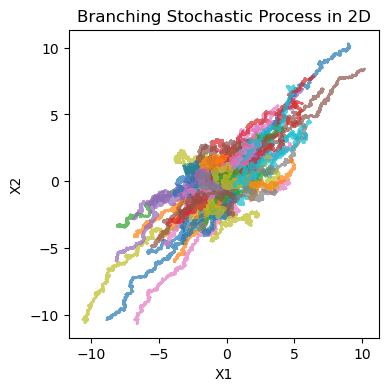

In [58]:
A = np.array([[0.5, 0.5], 
              [0.5, 0.5]])
d = A.shape[0]
# A = np.array([1.0])

G = np.array([[1, 0.0], 
              [0.0, 1]])

G = np.eye(d)
# G = np.array([1.0])

H = G@G.T

growth_rate = 0.0 # 0.75
# lambda_func = lambda X: 1.3 * np.exp(-0.01*np.linalg.norm(X))  # Decaying branching rate
# lambda_func = lambda X: growth_rate # 1.0 # 1.0 # Constant branching rate

N_init = 100 # 5
X0 = np.random.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), N_init) # np.random.normal(0, 1, (N_init, A.shape[1]))
# X0 = np.random.normal(0, 1, (N_init))
Nt = 15000
process = BranchingStochasticProcess(A, G, dt=0.0001, Nt=Nt, N_traj=N_init)
# process = BranchingStochasticProcess(A, G, X0, no_branch_lambda_func, dt=0.0001, T=2.0, N_traj=10)
process.simulate(X0, growth_rate=growth_rate)
# process.simulate_track(X0, growth_rate=growth_rate)
print("Final number of trajectories:", process.N_traj)
# print(process.lineage_tree)
process.plot_trajectories(downsample=1)

# process.save_file(f'data/trajectories.h5', downsample_rate=500)

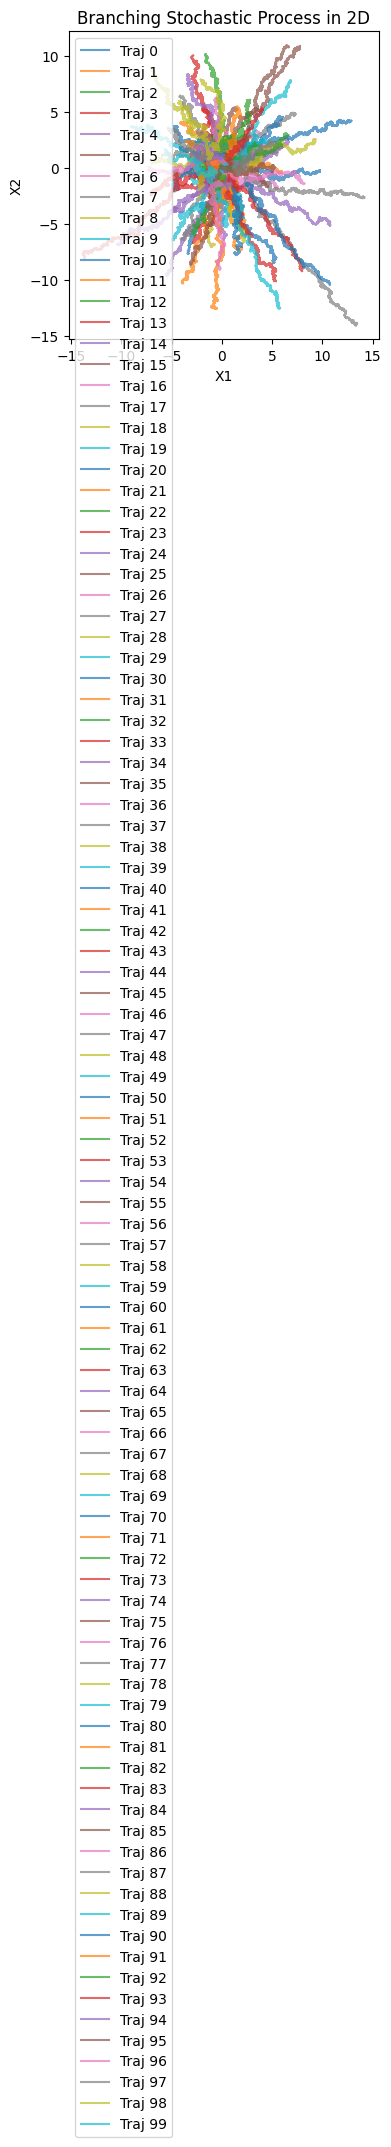

In [14]:
process.plot_trajectories(downsample=1, legend=True)

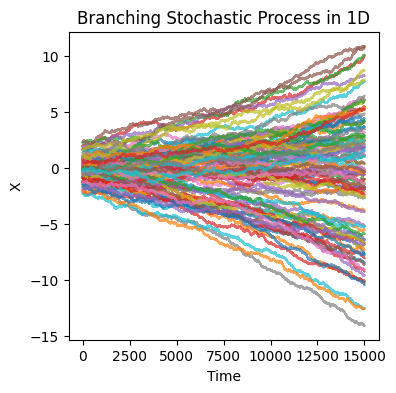

In [16]:
process.plot_trajectories(downsample=1, dim=1)

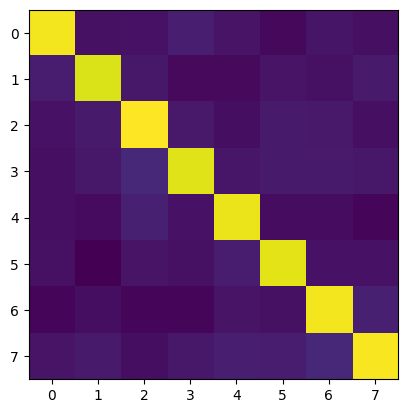

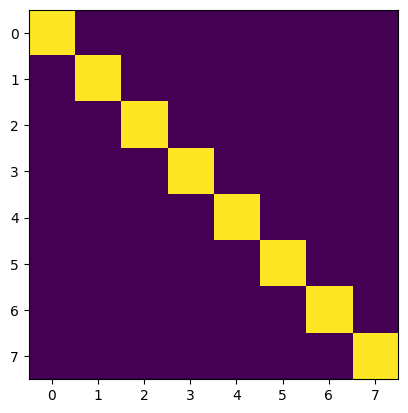

(<matplotlib.image.AxesImage at 0x129fbf020>,
 None,
 None)

In [18]:
A_mle_est = A_mle(process.trajectories, process.ts)
A_mle_est, np.linalg.norm(A_mle_est - A) / d
plt.imshow(A_mle_est), plt.show(), plt.imshow(A), plt.show()

N traj 100 N time steps 1500
iteration 0, running tolerance 7.483314773547883
iteration 10, running tolerance 0.110877992645951
iteration 20, running tolerance 0.10951626207129139
A_est:
 [[ 1.01962570e+00 -1.05544108e-02 -1.40265737e-02  2.20937906e-02
  -1.16600361e-02 -1.98509301e-02  9.41810889e-03 -8.47709712e-03]
 [ 2.93283811e-02  9.64099990e-01  7.80226646e-03 -3.38234152e-02
  -4.09485907e-02  1.66282627e-03 -2.00490584e-02  1.81730381e-02]
 [-2.43826839e-02  1.98062301e-02  1.03346417e+00  2.50018230e-03
  -1.91956199e-02  1.16771951e-02  1.76599953e-02 -1.80785783e-02]
 [-5.46538764e-03 -2.84468118e-04  6.47455200e-02  9.87809218e-01
   3.72046410e-03  2.57134528e-02  1.67790001e-02  3.24552443e-02]
 [-1.68336436e-02 -2.88501578e-02  3.22858649e-02 -9.39651680e-04
   9.98768181e-01 -2.21938023e-02 -2.03812411e-02 -4.77946216e-02]
 [-1.67047992e-02 -6.33070398e-02  7.68797003e-03 -1.72590028e-02
   3.36275319e-02  9.86055749e-01 -7.15216288e-03 -1.78545833e-03]
 [-5.37178635e

(<matplotlib.image.AxesImage at 0x12ace51c0>,
 <matplotlib.colorbar.Colorbar at 0x129f1aa50>)

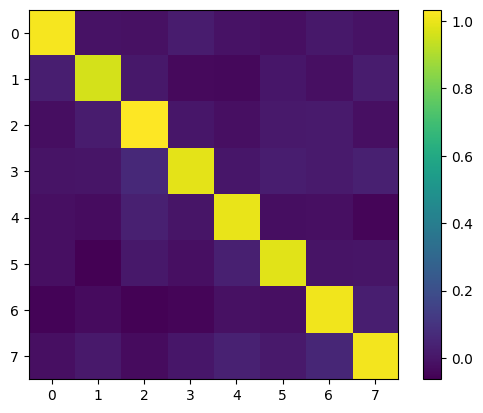

In [20]:

# xs_data: (N, N_traj, d)
# ts_data: (N,)
downsample_rate = 10

ts_data = process.ts[::downsample_rate]
xs_data = process.marginals(downsample_rate=downsample_rate)

# xs_data = marginals(apply_permutation(process.trajectories[:, :-1:downsample_rate, :]))

print("N traj", process.N_traj, "N time steps", ts_data.shape[0])

ridge_lambda = 0.0

A_guess = A # np.eye(2) # A
H_guess = G@G.T # np.eye(2) # G@G.T
As, Hs, Pis = appex_rectangle(xs_data, ts_data, A_guess, H_guess, N_sample=process.N_traj*10, ridge_lambda=ridge_lambda, tol=1e-5, maxiters=30, print_out=10, save_coupling=True, reverse=False)

A_est = As[-1]
H_est = Hs[-1]
Pi_est = Pis[-1]
print("A_est:\n", A_est)
print("H_est:\n", H_est)
plt.imshow(A_est), plt.colorbar()

(<matplotlib.image.AxesImage at 0x1289e2990>,
 <matplotlib.colorbar.Colorbar at 0x12adcf830>)

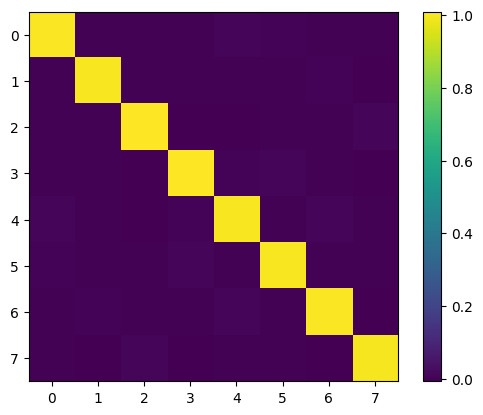

In [21]:
plt.imshow(H_est), plt.colorbar()

In [13]:

# xs_data: (N, N_traj, d)
# ts_data: (N,)
downsample_rate = 100

ts_data = process.ts[::downsample_rate]
xs_data = process.marginals(downsample_rate=downsample_rate)

# xs_data = marginals(apply_permutation(process.trajectories[:, :-1:downsample_rate, :]))

print("N traj", process.N_traj, "N time steps", ts_data.shape[0])

ridge_lambda = 0.0

A_guess = A # np.eye(2) # A
H_guess = G@G.T # np.eye(2) # G@G.T
appex_maxiters = 20
N_sample = process.N_traj*3

As, Hs, Pis = appex_rectangle(xs_data, ts_data, A_guess, H_guess, N_sample=N_sample, ridge_lambda=ridge_lambda, tol=1e-5, maxiters=appex_maxiters, print_out=10, save_coupling=True, reverse=False)

A_est = As[-1]
H_est = Hs[-1]
Pi_est = Pis[-1]
print("A_est:\n", A_est)
print("H_est:\n", H_est)

As_reverse, Hs_reverse, Pis_reverse = appex_rectangle(xs_data, ts_data, A_guess, H_guess, N_sample=N_sample, ridge_lambda=ridge_lambda, tol=1e-5, maxiters=appex_maxiters, print_out=10, save_coupling=True, reverse=True)

A_est = As_reverse[-1]
H_est = Hs_reverse[-1]
Pi_est = Pis_reverse[-1]
print("A_est:\n", A_est)
print("H_est:\n", H_est)


N traj 14 N time steps 150
iteration 0, running tolerance 1.4212670403551897
iteration 10, running tolerance 0.12212854567492362
A_est:
 [[ 0.57976369  0.28546477]
 [-0.34034245  1.13682774]]
H_est:
 [[1.04579483 0.00791824]
 [0.00791824 1.03821168]]
iteration 0, running tolerance 1.4212670403551897
iteration 10, running tolerance 0.1120613387360324
A_est:
 [[ 0.61278085  0.31286356]
 [-0.3392834   1.11003673]]
H_est:
 [[1.05056568 0.01395024]
 [0.01395024 1.03028222]]


A mle error 3.351855926608406
H mle error 0.01563093352001149
A algorithm error 9.15607100463074
H algorithm error 0.10383329069116759


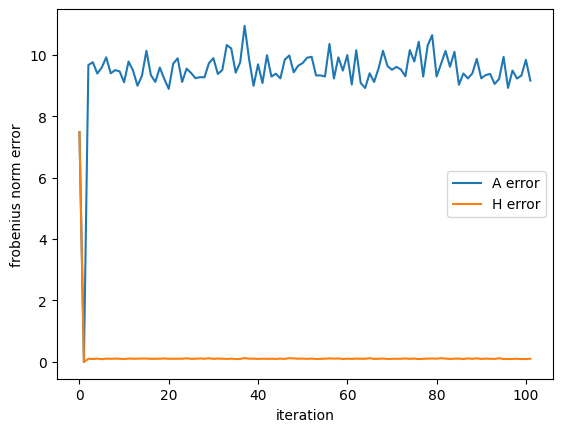

In [49]:
matrix_errors(process, As, Hs, downsample_rate=2, plot=True);

A mle error 0.34750368691999994
H mle error 0.005612492961646894
A algorithm error 0.5361735342991389
H algorithm error 0.06068522366505951


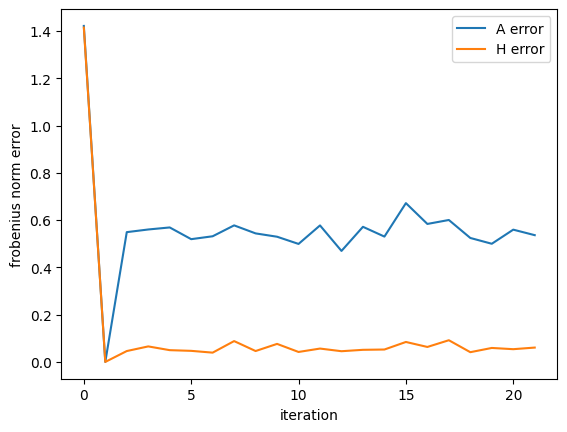

A mle error 0.34750368691999994
H mle error 0.005612492961646894
A algorithm error 0.5144066409536863
H algorithm error 0.06215400024716611


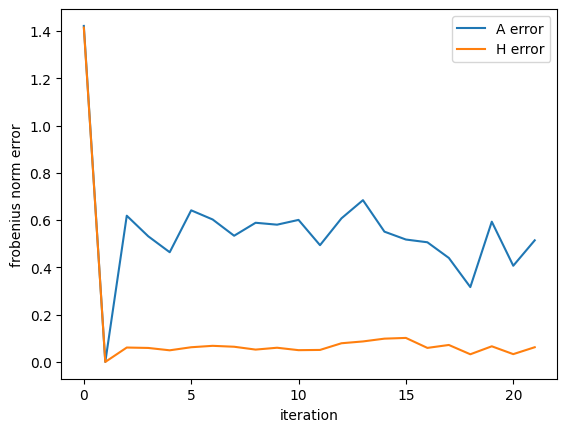

([np.float64(1.4212670403551897),
  np.float64(0.0),
  np.float64(0.6184809731878982),
  np.float64(0.5314607827940285),
  np.float64(0.4639782431215637),
  np.float64(0.6412536753246997),
  np.float64(0.6025136575217667),
  np.float64(0.5337474217939043),
  np.float64(0.5886171374740373),
  np.float64(0.580541521700043),
  np.float64(0.6007332036334507),
  np.float64(0.4938201405089929),
  np.float64(0.6074262769173794),
  np.float64(0.6842152331325818),
  np.float64(0.5510175416177965),
  np.float64(0.5177025344137919),
  np.float64(0.5061183236542065),
  np.float64(0.43983385489269755),
  np.float64(0.3165470716556853),
  np.float64(0.5931678498416239),
  np.float64(0.40680769306542264),
  np.float64(0.5144066409536863)],
 [np.float64(1.4142135623730951),
  np.float64(0.0),
  np.float64(0.06086612698654047),
  np.float64(0.05911597051605883),
  np.float64(0.04913573161613219),
  np.float64(0.062097152625121894),
  np.float64(0.06807217187966348),
  np.float64(0.0642258312582069),
  

In [14]:
matrix_errors(process, As, Hs, downsample_rate=2, plot=True)
matrix_errors(process, As_reverse, Hs_reverse, downsample_rate=2, plot=True)

A error 0.5361735342991389
H error 0.06068522366505951


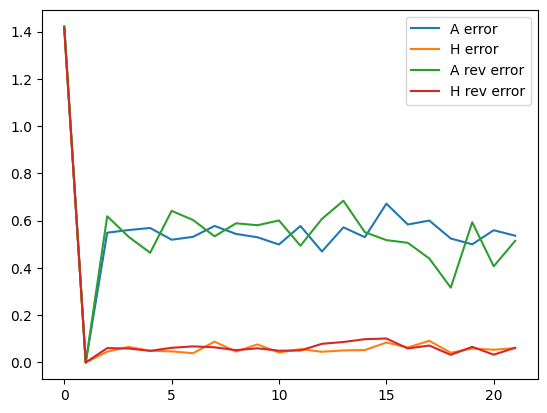

In [15]:
plt.plot(matrix_errors(process, As, Hs)[0], label="A error")
plt.plot(matrix_errors(process, As, Hs)[1], label="H error")
plt.plot(matrix_errors(process, As_reverse, Hs_reverse)[0], label="A rev error")
plt.plot(matrix_errors(process, As_reverse, Hs_reverse)[1], label="H rev error")

print("A error", matrix_errors(process, As, Hs)[0][-1])
print("H error", matrix_errors(process, As, Hs)[1][-1])
plt.legend()

5 5


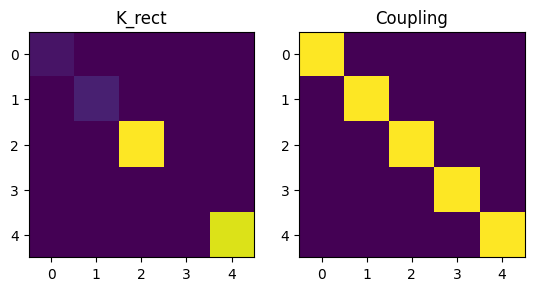

In [58]:
# idx=process.get_branch_times(downsample_rate=downsample_rate)[4]
idx = 4
plot_kernel_coupling(idx, xs_data, ts_data, A_est, H_est)


(<matplotlib.image.AxesImage at 0x1330d8830>,
 <matplotlib.colorbar.Colorbar at 0x143c73bc0>)

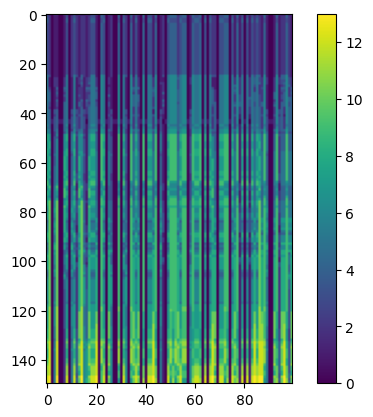

In [17]:
plt.imshow(sample_trajectory_idxs_rectangle(Pi_est, N_sample=100).T), plt.colorbar()

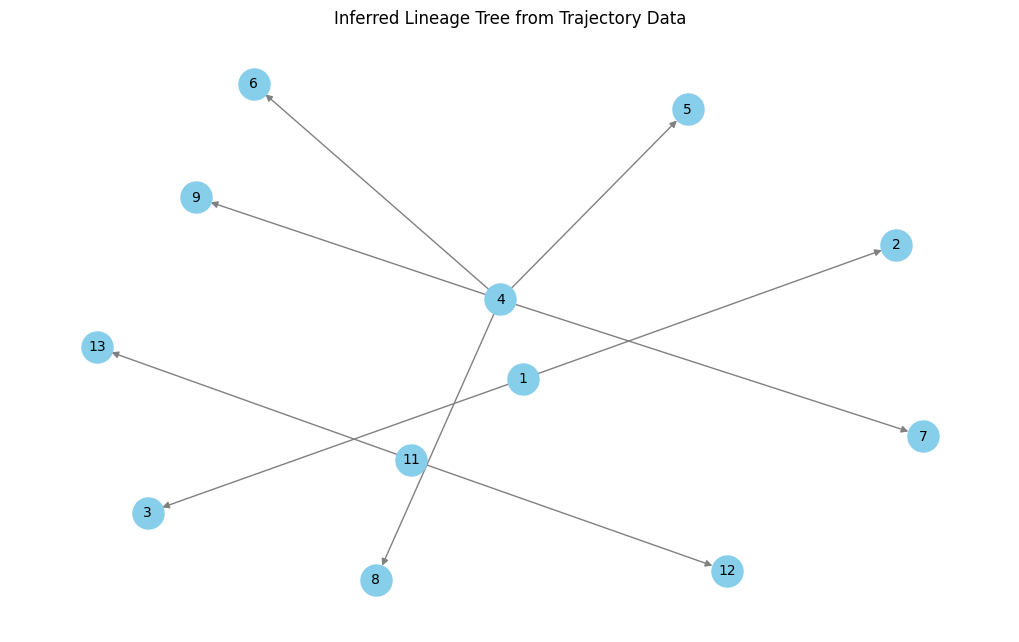

Inferred Lineage Tree: {0: -1, 1: -1, 2: 1, 3: 1, 4: -1, 5: 4, 6: 4, 7: 4, 8: 4, 9: 4, 10: -1, 11: -1, 12: 11, 13: 11}


In [18]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

def infer_lineage_tree(trajectories):
    """
    Infers the lineage tree from trajectory data, identifying branching points based on divergence.
    
    Parameters:
        trajectories (np.ndarray): Array of shape (N_traj, N_time, dim),
                                   where each trajectory may be duplicated until branching.
    
    Returns:
        lineage (dict): Dictionary where keys are child indices and values are parent indices.
    """
    N_traj, N_time, _ = trajectories.shape
    lineage = {0: -1}  # Root trajectory has no parent (-1)
    
    for i in range(1, N_traj):  # Start from second trajectory
        parent = None

        # Compare trajectory `i` to previous ones
        for j in range(i):
            # Find the first divergence point
            divergence_time = np.where(np.any(trajectories[i] != trajectories[j], axis=1))[0]
            
            if len(divergence_time) > 0:  # If there is divergence
                first_divergence = divergence_time[0]  # Time step where they first differ
            else:
                first_divergence = N_time  # No divergence (identical trajectory)
            
            # If they were identical until the branching point, assign `j` as parent
            if first_divergence > 0:  # They were identical up to some point
                parent = j
                break  # Stop searching once we find the closest parent

        # Store the most recent identical trajectory as the parent
        lineage[i] = parent if parent is not None else -1  # Assign -1 if no parent found
    
    return lineage

def plot_lineage_tree(lineage):
    """Plots the inferred lineage tree using networkx and matplotlib (spring layout)."""
    G = nx.DiGraph()
    
    for child, parent in lineage.items():
        if parent != -1:  # Avoid adding the root as its own parent
            G.add_edge(parent, child)

    plt.figure(figsize=(10, 6))
    
    # Use spring layout (no pygraphviz required)
    pos = nx.spring_layout(G, seed=42)
    nx.draw(G, pos, with_labels=True, node_size=500, node_color="skyblue", edge_color="gray", font_size=10, arrows=True)
    
    plt.title("Inferred Lineage Tree from Trajectory Data")
    plt.show()

# Example: Simulated trajectory dataset
N_traj, N_time, dim = 6, 5, 2
trajectories = np.array([
    [[0,0], [1,1], [2,2], [3,3], [4,4]],  # Traj 0 (Root)
    [[0,0], [1,1], [2,2], [3,3], [4,4]],  # Traj 1 (Duplicate of 0, should be child of 0)
    [[0,0], [1,1], [2,2], [3,3], [5,5]],  # Traj 2 (Branches from 0 at t=4)
    [[0,0], [1,1], [2,2], [3,3], [6,6]],  # Traj 3 (Branches from 0 at t=4)
    [[0,0], [1,1], [2,2], [3,3], [5,5]],  # Traj 4 (Duplicate of 2, should be child of 2)
    [[0,0], [1,1], [2,2], [3,4], [4,4]]   # Traj 5 (Branches from 0 at t=3)
])

# Infer the lineage tree
lineage_tree = infer_lineage_tree(process.trajectories)

# Plot the inferred tree
plot_lineage_tree(lineage_tree)

# Print inferred lineage for debugging
print("Inferred Lineage Tree:", lineage_tree)


[]

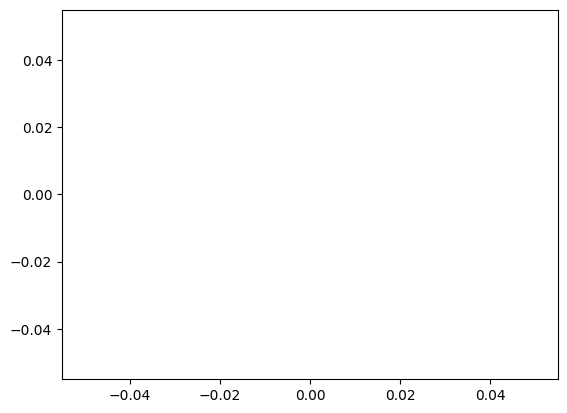

In [19]:
plt.plot(process.trajectories[[k for (k,v) in lineage_tree.items() if v==14], :, 1].T)

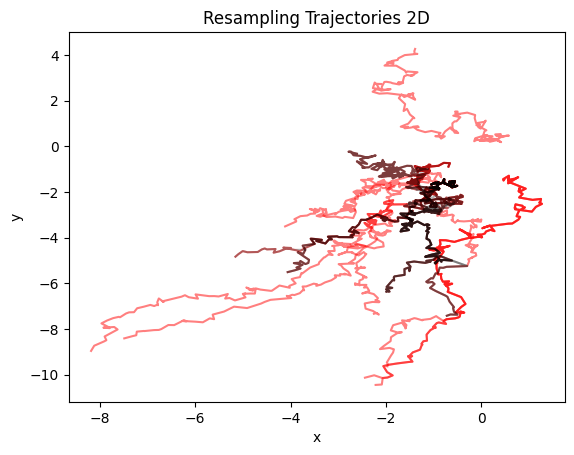

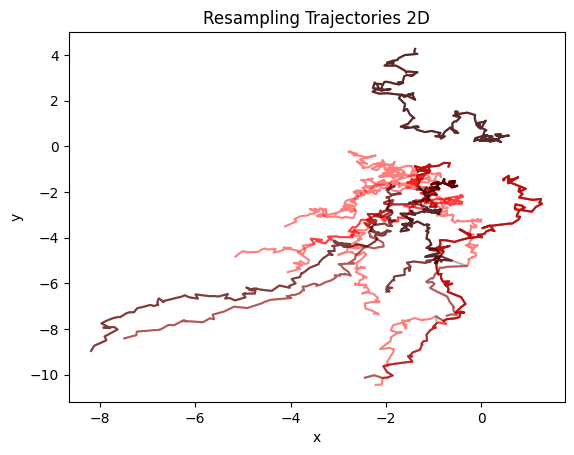

In [23]:
skip = 0
plot_sampling(xs_data[skip:], ts_data, Pi_est[skip:], process.downsample(downsample_rate), process.get_branch_times(downsample_rate), N_sample=10, plot_dim=2, reverse=True)
plot_sampling(xs_data[skip:], ts_data, Pi_est[skip:], process.downsample(downsample_rate), process.get_branch_times(downsample_rate), N_sample=10, plot_dim=2, reverse=False)

14


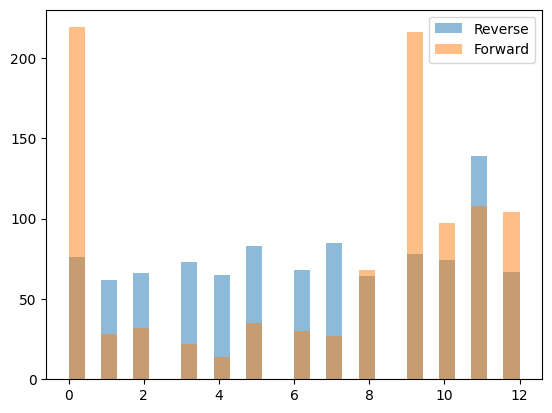

In [24]:
sampled_idxs_reverse = sample_trajectory_idxs_rectangle_reverse(Pi_est, N_sample=1000)
sampled_idxs = sample_trajectory_idxs_rectangle(Pi_est, N_sample=1000)
# plt.imshow(sampled_idxs.T), plt.colorbar()
print(process.N_traj)

Nt_idx = 140
plt.hist(sampled_idxs_reverse[:,Nt_idx], bins=2*process.N_traj, label="Reverse", alpha=0.5)
plt.hist(sampled_idxs[:,Nt_idx], bins=2*process.N_traj, label="Forward", alpha=0.5)
plt.legend()

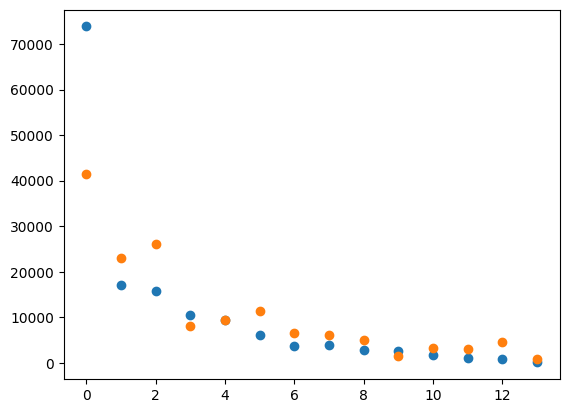

In [ ]:
# count unique elements
plt.scatter(*np.unique(sampled_idxs_reverse, return_counts=True))
plt.scatter(*np.unique(sampled_idxs, return_counts=True))

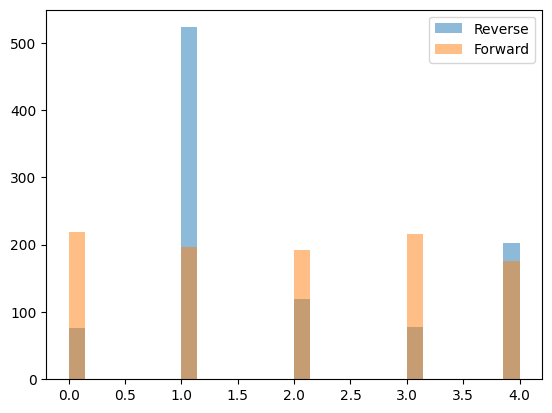

In [25]:
Nt_idx = 0
plt.hist(sampled_idxs_reverse[:,Nt_idx], bins=2*process.N_traj, label="Reverse", alpha=0.5)
plt.hist(sampled_idxs[:,Nt_idx], bins=2*process.N_traj, label="Forward", alpha=0.5)
plt.legend()

In [26]:
sampled_idxs = sample_trajectory_idxs_rectangle_reverse(Pi_est, N_sample=100)
traj_idxs = np.unique(sampled_idxs)

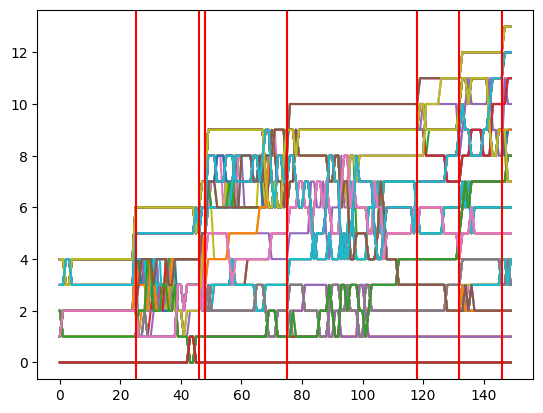

In [28]:
from collections import Counter

N_traj, N_sample = sampled_idxs.shape
n_gram_counts = [Counter() for i in range(N_traj)]

for traj in range(N_traj):
    for i in range(N_sample - 1):
        n_gram_tuple = (int(sampled_idxs[traj, i]), int(sampled_idxs[traj, i+1]))
        n_gram_counts[traj][n_gram_tuple] += 1

def get_children(n_gram_counts, parent):
    return {k[1]: v for (k,v) in n_gram_counts.items() if k[0]==parent}

def get_conditional(n_gram_counts, parent):
    total = sum(list(get_children(n_gram_counts, parent).values()))
    print(total)
    return {k: v/total for (k,v) in get_children(n_gram_counts, parent).items()}

def get_time_children(n_gram_counts, parent):
    return [get_children(n_gram_counts[traj], parent) for traj in range(N_traj)]
    # return {k[1]: v for (k,v) in n_gram_counts.items() if k[0]==parent and k[1]==Nt_idx}
get_time_children(n_gram_counts, 2)
plt.plot(sampled_idxs[:,:].T);
[plt.axvline(process.get_branch_times(downsample_rate)[i], color='r') for i in range(1, len(process.get_branch_times(downsample_rate)))];
# get_time_children(n_gram_counts, 2)
# get_children(n_gram_counts, 6)
# get_conditional(n_gram_counts, 6)
# {k: v for (k,v) in lineage_tree.items() if k==1}
# print(list(n_gram_counts.items()))


In [ ]:
np.concatenate([np.linalg.eigvals(matrices[:, :, i]) for i in range(1000)])

(8000,)

array([ 2.51094069+0.j        , -1.88599908+1.47418639j,
       -1.88599908-1.47418639j, ...,  0.15370356-1.53252805j,
        1.71002903+0.j        ,  1.06939414+0.j        ])

In [57]:
len([A[i, :, :].tolist() for i in range(A.shape[0])])

1000

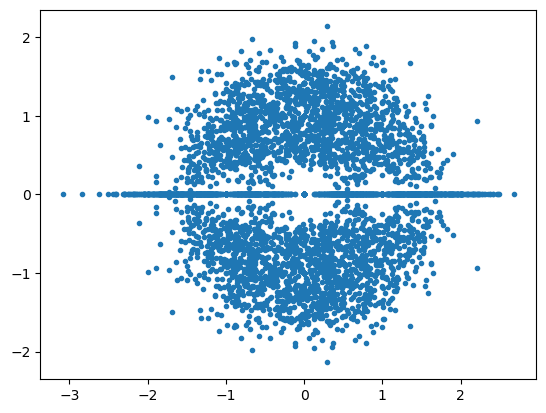

In [56]:
p_zero = 0.7
p_other = (1-p_zero)/2
n_matrices = 1000
A = np.random.choice([-1, 0, 1], p=[p_other, p_zero, p_other],size=(n_matrices, d, d))


# evals = np.concatenate([np.linalg.eigvals(A[:, :, i]) for i in range(1000)])

plt.plot(np.real(evals), np.imag(evals), '.')


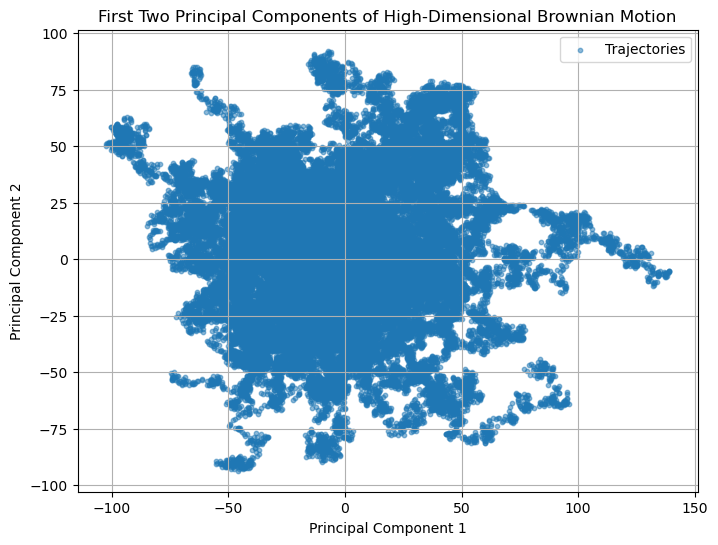

In [5]:
# Generate high-dimensional Brownian motion
timesteps = 1000 #  ts_data.shape[0]
dim = 10
num_trajectories = 100  # Number of trajectories

# Brownian motion: cumulative sum of random Gaussian noise
brownian_motion = np.cumsum(np.random.normal(size=(timesteps, num_trajectories, dim)), axis=0)

# Perform SVD on the reshaped Brownian motion data
reshaped_data = brownian_motion.reshape(timesteps * num_trajectories, dim)
U, S, Vt = np.linalg.svd(reshaped_data, full_matrices=False)

# Project data onto the first two principal components
pc1 = reshaped_data @ Vt.T[:, 0]
pc2 = reshaped_data @ Vt.T[:, 1]

# Plot the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(pc1, pc2, alpha=0.5, s=10, label="Trajectories")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("First Two Principal Components of High-Dimensional Brownian Motion")
plt.legend()
plt.grid()
plt.show()